In [1]:
import pandas as pd

ldaResults = pd.read_csv("test-lda-with-pruning.csv", error_bad_lines=False)

C:\Users\ncy_k\AppData\Local\Programs\Python\Python38\lib\site-packages\IPython\core\interactiveshell.py:3441: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


In [2]:
ldaResults.columns = ["_", "Model", "Corpus", "Alpha", "Beta", "Number of Topics", "Top Words", "CV Score", "C_UCI Score"]
groupedLdaResults = ldaResults.groupby(ldaResults.Corpus)

sacStaffLda = groupedLdaResults.get_group("Compiled Data Challenges - SAC Staff")
volunteerLda = groupedLdaResults.get_group("Compiled Data Challenges - Volunteer")
compiledLda = groupedLdaResults.get_group("Compiled Data Challenges")

In [3]:
sacStaffLda = sacStaffLda.astype({"Alpha":str})
sacStaffLda.dtypes["Alpha"]

sacStaffLda.head(10)

,_,Model,Corpus,Alpha,Beta,Number of Topics,Top Words,CV Score,C_UCI Score
0,0,LDA,Compiled Data Challenges - SAC Staff,0.01,0.01,6,"[(0, '0.220*""come"" + 0.162*""know"" + 0.138*""wan...",0.394824,-1.144175
1,0,LDA,Compiled Data Challenges - SAC Staff,0.01,0.01,4,"[(0, '0.214*""like"" + 0.134*""senior"" + 0.116*""c...",0.362970,-1.540015
2,0,LDA,Compiled Data Challenges - SAC Staff,0.01,0.01,8,"[(0, '0.165*""mean"" + 0.140*""come"" + 0.110*""cal...",0.379973,-1.316988
3,0,LDA,Compiled Data Challenges - SAC Staff,0.01,0.01,12,"[(0, '0.739*""cannot"" + 0.185*""come"" + 0.062*""m...",0.382372,-1.104341
4,0,LDA,Compiled Data Challenges - SAC Staff,0.01,0.01,14,"[(0, '0.307*""know"" + 0.208*""senior"" + 0.177*""t...",0.338458,-1.745723
5,0,LDA,Compiled Data Challenges - SAC Staff,0.01,0.01,16,"[(0, '0.260*""people"" + 0.172*""right"" + 0.130*""...",0.338968,-1.672784
6,0,LDA,Compiled Data Challenges - SAC Staff,0.01,0.01,10,"[(0, '0.214*""people"" + 0.128*""senior"" + 0.100*...",0.336633,-1.676711
7,0,LDA,Compiled Data Challenges - SAC Staff,0.01,0.01,18,"[(0, '0.612*""senior"" + 0.171*""case"" + 0.105*""a...",0.336666,-1.765882
8,0,LDA,Compiled Data Challenges - SAC Staff,0.01,0.01,22,"[(0, '0.465*""senior"" + 0.188*""case"" + 0.140*""k...",0.335699,-1.602111
9,0,LDA,Compiled Data Challenges - SAC Staff,0.01,0.01,20,"[(0, '0.336*""need"" + 0.085*""call"" + 0.085*""lik...",0.325948,-1.683606


In [6]:
import re

def lda_pd_series_to_dict (series):
    res = {}
    series = series.split(",")
    for index in range(0, len(series)-1, 2):
        series[index] = re.sub(r'[^\w\s]', '', series[index]).strip()
        res[series[index]] = [word.strip() for word in re.findall(r'"(.*?)"', series[index+1])]
        
    return res

<AxesSubplot:xlabel='Number of Topics', ylabel='C_UCI Score'>

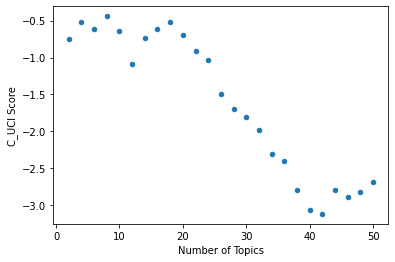

In [6]:
sampleDf = sacStaffLda[(sacStaffLda["Alpha"]=="0.9099999999999999") & (sacStaffLda["Beta"]=="0.31")]

sampleDf.plot.scatter(x="Number of Topics", y="C_UCI Score")

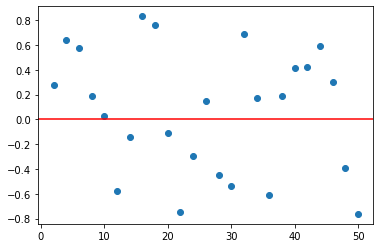

In [336]:
import numpy as np
import matplotlib.pyplot as plt

sampleCUCIScores = sampleDf["C_UCI Score"]
d2CUCIScores = np.gradient(np.gradient(sampleCUCIScores))

plt.axhline(y=0, color='r', linestyle='-')
plt.scatter(sampleDf["Number of Topics"], d2CUCIScores)

<AxesSubplot:xlabel='Number of Topics', ylabel='C_UCI Score'>

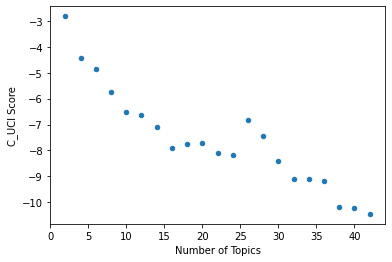

In [337]:
sampleDf = sacStaffLda[(sacStaffLda["Alpha"]=="0.61") & (sacStaffLda["Beta"]=="0.31") & (sacStaffLda["C_UCI Score"]>=-10.5)]

sampleDf.plot.scatter(x="Number of Topics", y="C_UCI Score")

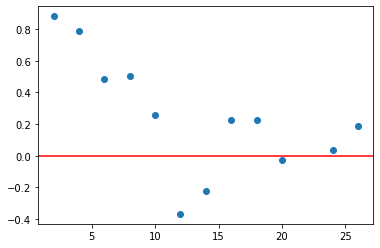

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

sampleCUCIScores = sampleDf["C_UCI Score"]
d2CUCIScores = np.gradient(np.gradient(sampleCUCIScores))

plt.axhline(y=0, color='r', linestyle='-')
plt.scatter(sampleDf["Number of Topics"], d2CUCIScores)

<AxesSubplot:xlabel='Beta', ylabel='CV Score'>

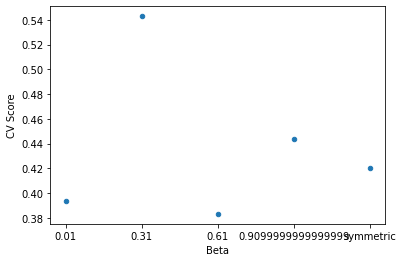

In [12]:
sampleDf = sacStaffLda[(sacStaffLda["Number of Topics"]==30) & (sacStaffLda["Alpha"]=="0.9099999999999999")]
sampleDf.plot.scatter(x="Beta", y="CV Score")

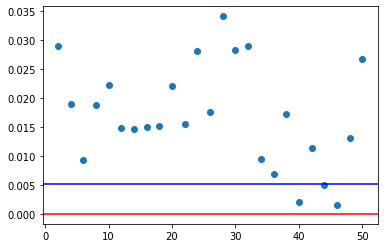

In [295]:
import numpy as np
import matplotlib.pyplot as plt

sampleCVScores = sampleDf["CV Score"]
d2CVScores = np.abs(np.gradient(np.gradient(sampleCVScores)))

plt.axhline(y=0, color='r', linestyle='-')
plt.axhline(y=np.mean(d2CVScores)*0.3, color='b', linestyle='-')
plt.scatter(sampleDf["Number of Topics"], d2CVScores)

<AxesSubplot:xlabel='Number of Topics', ylabel='CV Score'>

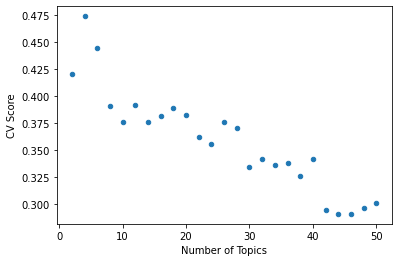

In [7]:
sampleDf = sacStaffLda[(sacStaffLda["Alpha"]=="0.61") & (sacStaffLda["Beta"]=="0.31")]
sampleDf.plot.scatter(x="Number of Topics", y="CV Score")

[2]


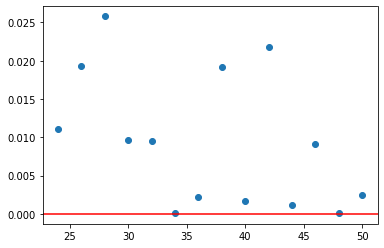

In [259]:
sampleCVScores = sampleDf["CV Score"]
d2CVScores = np.gradient(np.gradient(sampleCVScores))

plt.axhline(y=0, color='r', linestyle='-')
plt.scatter(sampleDf["Number of Topics"], np.abs(d2CVScores))

print (np.where(d2CVScores == np.amin(d2CVScores))[0])


# CONCLUSION: The number of topic before the min D2 is the best Num of Topics

[2]
0.0012432786613486846
6


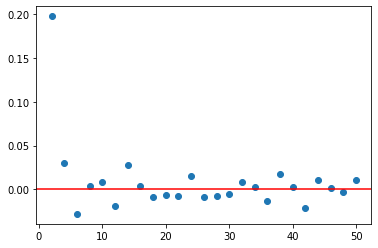

In [152]:
from scipy.interpolate import UnivariateSpline

y_spl = UnivariateSpline(sampleDf["Number of Topics"], sampleCVScores, s=0, k=4)

y_spl_2d = y_spl.derivative(n=2)

plt.scatter(sampleDf["Number of Topics"],y_spl_2d(sampleDf["Number of Topics"]))
plt.axhline(y=0, color='r', linestyle='-')

fitted = y_spl_2d(sampleDf["Number of Topics"])

print (np.where(fitted == np.amin(fitted))[0])
print (d2CVScores[2])
print (sampleDf["Number of Topics"].iloc[2])

In [324]:
def find_point_of_diminishing_return (scores, d2, score_type):
    scores = np.array(scores)
    d2 = np.array(d2)

    d2_to_scores = {}
    scores_to_index = {}

    for i in range(len(scores)):
        d2_to_scores[d2[i]] = scores[i]
        scores_to_index[scores[i]] = i
        
    mean = np.mean(d2)

    podf = 0

    for d in d2:
        score = d2_to_scores[d]
        index = scores_to_index[score]

        if score_type == "CV":
            if score > 0.65 and d < mean*0.4:
                podf = index
                if index < len(scores)-1:
                    if scores[index+1] > score:
                        return index
                else:
                    return podf
        else:
            if score < -8 and d < mean*0.4:
                podf = index
                if index < len(scores)-1:
                    if scores[index+1] < score:
                        return index
                else:
                    return podf
    
    return podf

In [339]:
ldaBestScoresPerParams = pd.DataFrame()
alpha = list(np.arange(0.01, 1, 0.3))
alpha.append('symmetric')
alpha.append('asymmetric')

beta = list(np.arange(0.01, 1, 0.3))
beta.append('symmetric')

params = [(a, b) for a in alpha for b in beta]

for df in [sacStaffLda, volunteerLda, compiledLda]:
    for param in params:
        ldaForThisParam = df[(df["Alpha"]==str(param[0])) & (df["Beta"]==str(param[1]))]
        cvScoreForThisParam = ldaForThisParam["CV Score"]
        cuciScoreForThisParam = ldaForThisParam["C_UCI Score"]

        cvD2 = np.abs(np.gradient(np.gradient(cvScoreForThisParam)))
        cuciD2 = np.gradient(np.gradient(cuciScoreForThisParam))

        # cvMinIndex = np.where(cvD2 == np.amin(cvD2))
        # cuciMinIndex = np.where(cuciD2 == np.amin(cuciD2))

        cvMinIndex = find_point_of_diminishing_return(cvScoreForThisParam, cvD2, "CV")
        cuciMinIndex = find_point_of_diminishing_return(cuciScoreForThisParam, cuciD2, "CUCI")

        ldaBestScoresPerParams = pd.concat([ldaForThisParam.iloc[[cvMinIndex]], ldaBestScoresPerParams])
        ldaBestScoresPerParams = pd.concat([ldaForThisParam.iloc[[cuciMinIndex]], ldaBestScoresPerParams])
    
ldaBestScoresPerParams["Top Words"] = ldaBestScoresPerParams["Top Words"].apply(lambda i: lda_pd_series_to_dict(i))
sortedLdaBestScoresPerParams =  ldaBestScoresPerParams.sort_values("CV Score", ascending=False)
print (sortedLdaBestScoresPerParams.head(10))

      _ Model                                Corpus               Alpha  \
1211  0   LDA              Compiled Data Challenges  0.9099999999999999   
199   0   LDA  Compiled Data Challenges - SAC Staff                0.31   
225   0   LDA  Compiled Data Challenges - SAC Staff                0.31   
1813  0   LDA  Compiled Data Challenges - Volunteer                0.61   
1831  0   LDA  Compiled Data Challenges - Volunteer                0.61   
455   0   LDA  Compiled Data Challenges - SAC Staff  0.9099999999999999   
1724  0   LDA  Compiled Data Challenges - Volunteer                0.31   
1954  0   LDA  Compiled Data Challenges - Volunteer  0.9099999999999999   
334   0   LDA  Compiled Data Challenges - SAC Staff                0.61   
309   0   LDA  Compiled Data Challenges - SAC Staff                0.61   

                    Beta  Number of Topics  \
1211  0.9099999999999999                26   
199                 0.61                50   
225   0.9099999999999999            

In [340]:
ldaBestScores = pd.DataFrame()

groupedLdaBestScoresPerParams = ldaBestScoresPerParams.groupby(ldaBestScoresPerParams.Corpus)

sacStaffLdaBestScoresPerParams = groupedLdaBestScoresPerParams.get_group("Compiled Data Challenges - SAC Staff")
volunteerLdaBestScoresPerParams = groupedLdaBestScoresPerParams.get_group("Compiled Data Challenges - Volunteer")
compiledLdaBestScoresPerParams = groupedLdaBestScoresPerParams.get_group("Compiled Data Challenges")

sacStaffBestCVScores = sacStaffLdaBestScoresPerParams["CV Score"].nlargest(5)
sacStaffBestCUCIScores =sacStaffLdaBestScoresPerParams["C_UCI Score"].nsmallest(5)
ldaBestScores = pd.concat([sacStaffLdaBestScoresPerParams.loc[sacStaffLdaBestScoresPerParams["CV Score"].isin(sacStaffBestCVScores)], ldaBestScores])
ldaBestScores = pd.concat([sacStaffLdaBestScoresPerParams.loc[sacStaffLdaBestScoresPerParams["C_UCI Score"].isin(sacStaffBestCUCIScores)], ldaBestScores])

volunteerBestCVScores = volunteerLdaBestScoresPerParams["CV Score"].nlargest(5)
volunteerBestCUCIScores =volunteerLdaBestScoresPerParams["C_UCI Score"].nsmallest(5)
ldaBestScores = pd.concat([volunteerLdaBestScoresPerParams.loc[volunteerLdaBestScoresPerParams["CV Score"].isin(volunteerBestCVScores)], ldaBestScores])
ldaBestScores = pd.concat([volunteerLdaBestScoresPerParams.loc[volunteerLdaBestScoresPerParams["C_UCI Score"].isin(volunteerBestCUCIScores)], ldaBestScores])

compiledBestCVScores = compiledLdaBestScoresPerParams["CV Score"].nlargest(5)
compiledBestCUCIScores =compiledLdaBestScoresPerParams["C_UCI Score"].nsmallest(5)
ldaBestScores = pd.concat([compiledLdaBestScoresPerParams.loc[compiledLdaBestScoresPerParams["CV Score"].isin(compiledBestCVScores)], ldaBestScores])
ldaBestScores = pd.concat([compiledLdaBestScoresPerParams.loc[compiledLdaBestScoresPerParams["C_UCI Score"].isin(compiledBestCUCIScores)], ldaBestScores])

ldaBestScores.to_csv("Best LDA Results.csv")
print (ldaBestScores)

      _ Model                                Corpus               Alpha  \
1240  0   LDA              Compiled Data Challenges  0.9099999999999999   
1211  0   LDA              Compiled Data Challenges  0.9099999999999999   
1163  0   LDA              Compiled Data Challenges  0.9099999999999999   
1140  0   LDA              Compiled Data Challenges  0.9099999999999999   
1062  0   LDA              Compiled Data Challenges                0.61   
1240  0   LDA              Compiled Data Challenges  0.9099999999999999   
1211  0   LDA              Compiled Data Challenges  0.9099999999999999   
1163  0   LDA              Compiled Data Challenges  0.9099999999999999   
1062  0   LDA              Compiled Data Challenges                0.61   
973   0   LDA              Compiled Data Challenges                0.31   
1954  0   LDA  Compiled Data Challenges - Volunteer  0.9099999999999999   
1831  0   LDA  Compiled Data Challenges - Volunteer                0.61   
1813  0   LDA  Compiled D

In [327]:
lfldaResults = pd.read_csv("LFLDA-Results.csv")
lfldaResults['Corpus'] = lfldaResults['Corpus'].str.strip()

lfldaResults.head(100)

Unnamed: 0                                Corpus  Number of Topics  Alpha  \
0            0  Compiled Data Challenges - SAC Staff                 2   0.01   
1            1  Compiled Data Challenges - SAC Staff                16   0.01   
2            2  Compiled Data Challenges - SAC Staff                12   0.01   
3            3  Compiled Data Challenges - SAC Staff                 2   0.01   
4            4  Compiled Data Challenges - SAC Staff                 8   0.01   
..         ...                                   ...               ...    ...   
95          95  Compiled Data Challenges - SAC Staff                42   0.01   
96          96  Compiled Data Challenges - SAC Staff                40   0.01   
97          97  Compiled Data Challenges - SAC Staff                44   0.01   
98          98  Compiled Data Challenges - SAC Staff                46   0.01   
99          99  Compiled Data Challenges - SAC Staff                 2   0.01   

    Beta  Lambda  \
0   0.01    0.31   
1   0.01    0.01   
2   0.01    0.01   
3   0.01    0.01   
4   0.01    0.01   
..   ...     ...   
95  0.01    0.91   
96  0.01    0.91   
97  0.01    0.91   
98  0.01    0.91   
99  0.31    0.01   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

In [306]:
groupedLfldaResults = lfldaResults.groupby(lfldaResults.Corpus)

sacStaffLflda = groupedLfldaResults.get_group("Compiled Data Challenges - SAC Staff")
volunteerLflda = groupedLfldaResults.get_group("Compiled Data Challenges - Volunteer")
compiledLflda = groupedLfldaResults.get_group("Compiled Data Challenges")

In [328]:
import re

def lflda_pd_series_to_dict (series):
    res = {}
    series = series.split("'")
    topic_num = 0
    for index in range(0, len(series)-1):
        series[index] = series[index].replace(",", " ")
        series[index] = re.sub(r'[^\w\s]', '', series[index]).strip()
        if len(series[index]) > 0:
            res[topic_num] = series[index]
            topic_num += 1
        
    return res

In [329]:
lfldaBestScoresPerParams = pd.DataFrame()
alpha = [0.01, 0.31, 0.61, 0.91]

beta = [0.01, 0.31, 0.61, 0.91]

lamda = [0.01, 0.31, 0.61, 0.91]

params = [(a, b, l) for a in alpha for b in beta for l in lamda]

for df in [sacStaffLflda, volunteerLflda, compiledLflda]:
    for param in params:
        lfldaForThisParam = df[(df["Alpha"]==param[0]) & (df["Beta"]==param[1]) & (df["Lambda"]==param[2]) & (df["Number of Topics"]<=20)]

        cvScoreForThisParam = lfldaForThisParam["CV Score"]
        cuciScoreForThisParam = lfldaForThisParam["C_UCI Score"]

        cvD2 = np.gradient(np.gradient(cvScoreForThisParam))
        cuciD2 = np.gradient(np.gradient(cuciScoreForThisParam))
        
        # cvMinIndex = np.where(cvD2 == np.amin(cvD2))
        # cuciMinIndex = np.where(cuciD2 == np.amin(cuciD2))

        cvMinIndex = find_point_of_diminishing_return(cvScoreForThisParam, cvD2, "CV")
        cuciMinIndex = find_point_of_diminishing_return(cuciScoreForThisParam, cuciD2, "CUCI")

        lfldaBestScoresPerParams = pd.concat([lfldaForThisParam.iloc[[cvMinIndex]], lfldaBestScoresPerParams])
        lfldaBestScoresPerParams = pd.concat([lfldaForThisParam.iloc[[cuciMinIndex]], lfldaBestScoresPerParams])
    
lfldaBestScoresPerParams["Top Words"] = lfldaBestScoresPerParams["Top Words"].apply(lambda i: lflda_pd_series_to_dict(i))
sortedLfldaBestScoresPerParams =  lfldaBestScoresPerParams.sort_values("CV Score", ascending=False)
print (sortedLfldaBestScoresPerParams.head(10))

      Unnamed: 0                                Corpus  Number of Topics  \
1184        1184  Compiled Data Challenges - SAC Staff                18   
2381        2381              Compiled Data Challenges                12   
1084        1084  Compiled Data Challenges - SAC Staff                18   
1856        1856              Compiled Data Challenges                14   
1980        1980              Compiled Data Challenges                10   
1879        1879              Compiled Data Challenges                 8   
1179        1179  Compiled Data Challenges - SAC Staff                10   
682          682  Compiled Data Challenges - SAC Staff                12   
1859        1859              Compiled Data Challenges                12   
283          283  Compiled Data Challenges - SAC Staff                16   

      Alpha  Beta  Lambda  \
1184   0.61  0.91    0.91   
2381   0.31  0.91    0.91   
1084   0.61  0.61    0.91   
1856   0.01  0.61    0.61   
1980   0.01  0.91 

In [330]:
lfldaBestScores = pd.DataFrame()

groupedLfldaBestScoresPerParams = lfldaBestScoresPerParams.groupby(lfldaBestScoresPerParams.Corpus)

sacStaffLfldaBestScoresPerParams = groupedLfldaBestScoresPerParams.get_group("Compiled Data Challenges - SAC Staff")
volunteerLfldaBestScoresPerParams = groupedLfldaBestScoresPerParams.get_group("Compiled Data Challenges - Volunteer")
compiledLfldaBestScoresPerParams = groupedLfldaBestScoresPerParams.get_group("Compiled Data Challenges")

sacStaffBestCVScores = sacStaffLfldaBestScoresPerParams["CV Score"].nlargest(5)
sacStaffBestCUCIScores =sacStaffLfldaBestScoresPerParams["C_UCI Score"].nsmallest(5)
lfldaBestScores = pd.concat([sacStaffLfldaBestScoresPerParams.loc[sacStaffLfldaBestScoresPerParams["CV Score"].isin(sacStaffBestCVScores)], lfldaBestScores])
lfldaBestScores = pd.concat([sacStaffLfldaBestScoresPerParams.loc[sacStaffLfldaBestScoresPerParams["C_UCI Score"].isin(sacStaffBestCUCIScores)], lfldaBestScores])

volunteerBestCVScores = volunteerLfldaBestScoresPerParams["CV Score"].nlargest(5)
volunteerBestCUCIScores =volunteerLfldaBestScoresPerParams["C_UCI Score"].nsmallest(5)
lfldaBestScores = pd.concat([volunteerLfldaBestScoresPerParams.loc[volunteerLfldaBestScoresPerParams["CV Score"].isin(volunteerBestCVScores)], lfldaBestScores])
lfldaBestScores = pd.concat([volunteerLfldaBestScoresPerParams.loc[volunteerLfldaBestScoresPerParams["C_UCI Score"].isin(volunteerBestCUCIScores)], lfldaBestScores])

compiledBestCVScores = compiledLfldaBestScoresPerParams["CV Score"].nlargest(5)
compiledBestCUCIScores =compiledLfldaBestScoresPerParams["C_UCI Score"].nsmallest(5)
lfldaBestScores = pd.concat([compiledLfldaBestScoresPerParams.loc[compiledLfldaBestScoresPerParams["CV Score"].isin(compiledBestCVScores)], lfldaBestScores])
lfldaBestScores = pd.concat([compiledLfldaBestScoresPerParams.loc[compiledLfldaBestScoresPerParams["C_UCI Score"].isin(compiledBestCUCIScores)], lfldaBestScores])

In [331]:
lfldaBestScores.to_csv("Best LFLDA Results.csv")

In [313]:
word2vecResults = pd.read_csv("Word2Vec-Results.csv")
word2vecResults.columns = ["_", "Model", "Corpus", "Number of Topics", "Top Words", "CV Score", "C_UCI Score"]

word2vecResults.head()

,_,Model,Corpus,Number of Topics,Top Words,CV Score,C_UCI Score
0,0,Word2Vec,Compiled Data Challenges - SAC Staff,4,"[['think', 'every', 'different', 'problem', 'd...",0.352469,-11.296180
1,0,Word2Vec,Compiled Data Challenges - SAC Staff,6,"[['think', 'every', 'different', 'problem', 'd...",0.392946,-12.863068
2,0,Word2Vec,Compiled Data Challenges - SAC Staff,8,"[['think', 'mean', 'know', 'maybe', 'sense', '...",0.488517,-11.321904
3,0,Word2Vec,Compiled Data Challenges - SAC Staff,10,"[['think', 'come', 'listening', 'contact', 'kn...",0.455072,-12.024413
4,0,Word2Vec,Compiled Data Challenges - SAC Staff,12,"[['think', 'example', 'somehow', 'know', 'case...",0.455776,-12.587042


In [314]:
groupedWord2VecResults = word2vecResults.groupby(word2vecResults.Corpus)

sacStaffWord2Vec = groupedWord2VecResults.get_group("Compiled Data Challenges - SAC Staff")
volunteerWord2Vec = groupedWord2VecResults.get_group("Compiled Data Challenges - Volunteer")
compiledWord2Vec = groupedWord2VecResults.get_group("Compiled Data Challenges")

In [315]:
import re

def word2vec_pd_series_to_dict (series):
    res = {}
    series = series.split(']')
    topic_num = 0
    for index in range(0, len(series)-1):
        series[index] = re.sub(r'[^\w\s]', '', series[index]).strip()
        res[topic_num] = series[index]
        topic_num += 1
        
    return res

In [316]:
word2vecBestScores = pd.DataFrame()

for df in [sacStaffWord2Vec, volunteerWord2Vec, compiledWord2Vec]:
    df = df[(df["Number of Topics"]<=20)]

    cvLWord2Vec = df["CV Score"].nlargest(5)
    cvBestWord2Vec = df.loc[df["CV Score"].isin(cvLWord2Vec)]
    cvBestWord2Vec["Top Words"] = cvBestWord2Vec["Top Words"].apply(lambda i: word2vec_pd_series_to_dict(i))

    cuciWord2Vec = df["C_UCI Score"].nsmallest(5)
    cuciBestWord2Vec = df.loc[df["C_UCI Score"].isin(cuciWord2Vec)]
    cuciBestWord2Vec["Top Words"] = cuciBestWord2Vec["Top Words"].apply(lambda i: word2vec_pd_series_to_dict(i))

    word2vecBestScores = pd.concat([cvBestWord2Vec, word2vecBestScores])
    word2vecBestScores = pd.concat([cuciBestWord2Vec, word2vecBestScores])

print(word2vecBestScores)

    _     Model                                Corpus  Number of Topics  \
27  0  Word2Vec              Compiled Data Challenges                 8   
30  0  Word2Vec              Compiled Data Challenges                14   
31  0  Word2Vec              Compiled Data Challenges                16   
32  0  Word2Vec              Compiled Data Challenges                18   
34  0  Word2Vec              Compiled Data Challenges                20   
28  0  Word2Vec              Compiled Data Challenges                10   
29  0  Word2Vec              Compiled Data Challenges                12   
31  0  Word2Vec              Compiled Data Challenges                16   
32  0  Word2Vec              Compiled Data Challenges                18   
34  0  Word2Vec              Compiled Data Challenges                20   
42  0  Word2Vec  Compiled Data Challenges - Volunteer                 2   
43  0  Word2Vec  Compiled Data Challenges - Volunteer                 4   
45  0  Word2Vec  Compiled

C:\Users\ncy_k\AppData\Local\Temp/ipykernel_1512/938210053.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cvBestWord2Vec["Top Words"] = cvBestWord2Vec["Top Words"].apply(lambda i: word2vec_pd_series_to_dict(i))
C:\Users\ncy_k\AppData\Local\Temp/ipykernel_1512/938210053.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cuciBestWord2Vec["Top Words"] = cuciBestWord2Vec["Top Words"].apply(lambda i: word2vec_pd_series_to_dict(i))


In [317]:
bertResults = pd.read_csv("Bert-Results.csv")
bertResults.columns = ["_", "Model", "Corpus", "Number of Topics", "Top Words", "CV Score", "C_UCI Score"]

bertResults.head()

,_,Model,Corpus,Number of Topics,Top Words,CV Score,C_UCI Score
0,0,BERT - Transformer,Compiled Data Challenges - SAC Staff,4,"[['think', 'every', 'centre', 'different', 'se...",0.566267,-5.682990
1,0,BERT - Transformer,Compiled Data Challenges - SAC Staff,6,"[['think', 'every', 'centre', 'different', 'se...",0.555523,-6.485973
2,0,BERT - Transformer,Compiled Data Challenges - SAC Staff,8,"[['think', 'every', 'centre', 'different', 'se...",0.516807,-6.749988
3,0,BERT - Transformer,Compiled Data Challenges - SAC Staff,10,"[['think', 'every', 'centre', 'different', 'se...",0.582084,-7.604686
4,0,BERT - Transformer,Compiled Data Challenges - SAC Staff,12,"[['think', 'every', 'centre', 'different', 'se...",0.483858,-7.523222


In [318]:
groupedBertResults = bertResults.groupby(bertResults.Corpus)

sacStaffBert = groupedBertResults.get_group("Compiled Data Challenges - SAC Staff")
volunteerBert = groupedBertResults.get_group("Compiled Data Challenges - Volunteer")
compiledBert = groupedBertResults.get_group("Compiled Data Challenges")

In [319]:
import re

def bert_pd_series_to_dict (series):
    res = {}
    series = series.split("]")
    topic_num = 0
    for index in range(0, len(series)-1):
        series[index] = re.sub(r'[^\w\s]', '', series[index]).strip()
        res[topic_num] = series[index]
        topic_num += 1
    return res

In [320]:
bertBestScores = pd.DataFrame()

for df in [sacStaffBert, volunteerBert, compiledBert]:
    df = df[(df["Number of Topics"]<=20)]
    
    cvDfBert = df["CV Score"].nlargest(5)
    cvBestDfBert = df.loc[df["CV Score"].isin(cvDfBert)]
    cvBestDfBert["Top Words"] = cvBestDfBert["Top Words"].apply(lambda i: bert_pd_series_to_dict(i))

    cuciDfBert = df["C_UCI Score"].nsmallest(5)
    cuciBestDfBert = df.loc[df["C_UCI Score"].isin(cuciDfBert)]
    cuciBestDfBert["Top Words"] = cuciBestDfBert["Top Words"].apply(lambda i: bert_pd_series_to_dict(i))

    bertBestScores = pd.concat([cvBestDfBert, bertBestScores])
    bertBestScores = pd.concat([cuciBestDfBert, bertBestScores])

print(bertBestScores)

    _               Model                                Corpus  \
28  0  BERT - Transformer              Compiled Data Challenges   
30  0  BERT - Transformer              Compiled Data Challenges   
31  0  BERT - Transformer              Compiled Data Challenges   
32  0  BERT - Transformer              Compiled Data Challenges   
33  0  BERT - Transformer              Compiled Data Challenges   
18  0  BERT - Transformer              Compiled Data Challenges   
21  0  BERT - Transformer              Compiled Data Challenges   
23  0  BERT - Transformer              Compiled Data Challenges   
26  0  BERT - Transformer              Compiled Data Challenges   
28  0  BERT - Transformer              Compiled Data Challenges   
42  0  BERT - Transformer  Compiled Data Challenges - Volunteer   
43  0  BERT - Transformer  Compiled Data Challenges - Volunteer   
46  0  BERT - Transformer  Compiled Data Challenges - Volunteer   
51  0  BERT - Transformer  Compiled Data Challenges - Voluntee

C:\Users\ncy_k\AppData\Local\Temp/ipykernel_1512/126189259.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cvBestDfBert["Top Words"] = cvBestDfBert["Top Words"].apply(lambda i: bert_pd_series_to_dict(i))
C:\Users\ncy_k\AppData\Local\Temp/ipykernel_1512/126189259.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cuciBestDfBert["Top Words"] = cuciBestDfBert["Top Words"].apply(lambda i: bert_pd_series_to_dict(i))


In [321]:
bestResults = pd.DataFrame()

bestResults = pd.concat([ldaBestScores, 
                        lfldaBestScores,
                        word2vecBestScores,
                        bertBestScores,
                        bestResults])

print (bestResults.head())

groupedBestResults = bestResults.groupby(bestResults.Corpus)

        _ Model                    Corpus               Alpha  \
1183  0.0   LDA  Compiled Data Challenges  0.9099999999999999   
1161  0.0   LDA  Compiled Data Challenges  0.9099999999999999   
1095  0.0   LDA  Compiled Data Challenges                0.61   
1064  0.0   LDA  Compiled Data Challenges                0.61   
1039  0.0   LDA  Compiled Data Challenges                0.61   

                    Beta  Number of Topics  \
1183                0.61                20   
1161                0.31                26   
1095  0.9099999999999999                44   
1064                0.61                32   
1039                0.31                32   

                                              Top Words  CV Score  \
1183  {'0': ['complicated', 'lose', 'afraid', 'would...  0.668060   
1161  {'0': ['translator', 'song', 'becomes', 'strug...  0.660667   
1095  {'0': ['afraid', 'correct', 'complicated', 'pr...  0.666505   
1064  {'0': ['lose', 'sorry', 'would', 'translator',... 

In [323]:
pd.set_option('display.max_colwidth', None)
sacStaffBestResults = groupedBestResults.get_group("Compiled Data Challenges - SAC Staff")
volunteerBestResults = groupedBestResults.get_group("Compiled Data Challenges - Volunteer")
compiledBestResults = groupedBestResults.get_group("Compiled Data Challenges")

sacStaffBestResults.to_csv("SAC Staff Best Results.csv")
volunteerBestResults.to_csv("Volunteer Best Results.csv")
compiledBestResults.to_csv("Compiled Best Results.csv")
